### Application of DCGAN for generation of images

#### Import libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, ReLU, LeakyReLU, Dropout, Dense, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization, Reshape, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

#### Load MNIST data and visualize

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

<ipython-input-4-7b1779f029fa>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2,n,i+1)


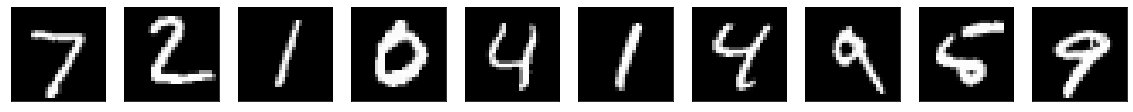

In [4]:
n = 10
plt.figure(figsize=(20,5))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
X_val = X_train[-10000:,:,:]
X_train = X_train[:-10000,:,:]
X_train.shape, X_val.shape

((50000, 28, 28), (10000, 28, 28))

In [6]:
#X_train = X_train.astype('float32')/255.
#X_val = X_val.astype('float32')/255.
#X_test = X_test.astype('float32')/255.

X_train_sc = np.reshape(X_train, (len(X_train),28,28,1))
X_val_sc = np.reshape(X_val, (len(X_val),28,28,1))
X_test_sc = np.reshape(X_test, (len(X_test),28,28,1))

In [7]:
X_train_sc.shape

(50000, 28, 28, 1)

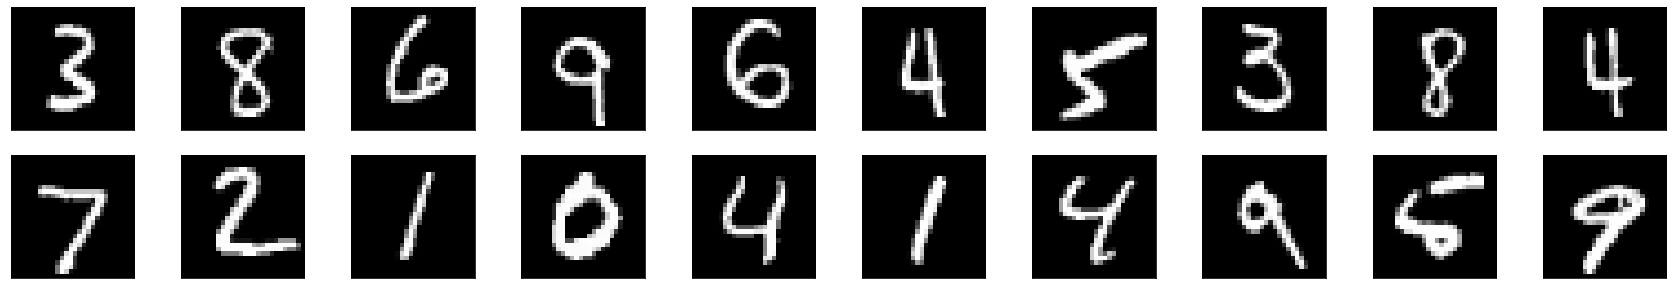

In [8]:
n = 10
plt.figure(figsize=(30,5))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_val_sc[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(X_test_sc[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Define discriminator

In [9]:
def discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['Accuracy'])
    return model

#### Preprocessing real data

In [10]:
def load_real_samples():
    # load mnist dataset
    (trainX, _), (_, _) = mnist.load_data()
    # expand to 3d, e.g. add channels dimension
    X = np.expand_dims(trainX, axis=-1)
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 255.0
    return X

#### Generate randomized real data

In [11]:
def generate_real_samples(dataset, n_samples):
    idx = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[idx]
    y = np.ones((n_samples, 1))
    return X, y

#### Generate fake data

In [12]:
def generate_fake_samples(n_samples):
    X = np.random.rand(28*28*n_samples)
    X = X.reshape((n_samples, 28,28,1))
    y = np.zeros((n_samples, 1))
    return X, y

#### Train discrminator with real and fake data

In [13]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch / 2)
    for i in range(n_iter):
        X_real, y_real = generate_real_samples(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('%d real = %.0f, fake = %.0f'%(i+1, real_acc*100, fake_acc*100))
    

In [14]:
discriminator_model = discriminator()
dataset =  load_real_samples()
train_discriminator(discriminator_model, dataset)

1 real = 28, fake = 27
2 real = 78, fake = 84
3 real = 79, fake = 99
4 real = 87, fake = 100
5 real = 81, fake = 100
6 real = 92, fake = 100
7 real = 89, fake = 100
8 real = 94, fake = 100
9 real = 95, fake = 100
10 real = 94, fake = 100
11 real = 95, fake = 100
12 real = 95, fake = 100
13 real = 95, fake = 100
14 real = 99, fake = 100
15 real = 98, fake = 100
16 real = 97, fake = 100
17 real = 98, fake = 100
18 real = 99, fake = 100
19 real = 99, fake = 100
20 real = 99, fake = 100
21 real = 99, fake = 100
22 real = 100, fake = 100
23 real = 100, fake = 100
24 real = 100, fake = 100
25 real = 100, fake = 100
26 real = 100, fake = 100
27 real = 100, fake = 100
28 real = 100, fake = 100
29 real = 100, fake = 100
30 real = 100, fake = 100
31 real = 100, fake = 100
32 real = 100, fake = 100
33 real = 100, fake = 100
34 real = 100, fake = 100
35 real = 100, fake = 100
36 real = 100, fake = 100
37 real = 100, fake = 100
38 real = 100, fake = 100
39 real = 100, fake = 100
40 real = 100, fake

#### Define generator model

In [16]:
def generator(latent_shape):
    model = Sequential()
    model.add(Dense(256*7*7, input_shape=(latent_shape,), use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape((7,7,256)))
    #assert model.output_shape == (None, 7, 7, 256)
    model.add(Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
    #assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))
    #assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='sigmoid', use_bias=False))
    #assert model.output_shape == (None, 28, 28, 1)
    return model

#### Define generation of fake data using generator model

In [17]:
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim*n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [15]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = np.zeros((n_samples,1))
    return X, y

#### Define GAN model

In [18]:
def GAN(generator, discriminator):
    discriminator.trainable=False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(learning_rate=0.0001, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model

In [19]:
def save_plot(examples, epoch, n=10):
    for i in range(n*n):
        plt.subplot(n,n,1+i)
        plt.axis('off')
        plt.imshow(examples[i,:,:,0], cmap='gray_r')
        
    filename = 'generated_plot_e%03d.png'%(epoch+1)
    plt.savefig(filename)
    plt.close()

In [20]:
def summarize_performance(epoch, gen, dis, dataset, latent_dim, n_samples=100):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = dis.evaluate(X_real, y_real, verbose=0)
    
    X_fake, y_fake = generate_fake_samples(gen, latent_dim, n_samples)
    _, acc_fake = dis.evaluate(X_fake, y_fake, verbose=0)
    
    print('%d real = %.0f, fake = %.0f'%(i+1, acc_real*100, acc_fake*100))
    
    save_plot(X_fake, epoch)
    
    filename = 'generator_model_%03d.h5'%(epoch+1)
    gen.save(filename)

#### Train GAN

In [21]:
def train_GAN(gen, dis, gan, dataset, latent_dim, n_epochs=10, n_batch=256):
    half_batch = int(n_batch / 2)
    bat_per_epo = int(dataset.shape[0]/n_batch)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(gen, latent_dim, half_batch)
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            d_loss, _ = dis.train_on_batch(X,y)
            
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch,1))
            g_loss = gan.train_on_batch(X_gan, y_gan)
            
            print('%d %d, %d, d = %.3f, g = %.3f'%(i+1, j+1, bat_per_epo, d_loss, g_loss))
            
        if (i+1)%10==0:
            summarize_performance(i, gen, dis, dataset, latent_dim)

In [22]:
latent_dim = 100
d_model = discriminator()
#d_model.summary()
g_model = generator(latent_dim)
#g_model.summary()
gan_model = GAN(g_model, d_model)

dataset = load_real_samples()
train_GAN(g_model, d_model, gan_model, dataset, latent_dim)

1 1, 234, d = 0.702, g = 0.724
1 2, 234, d = 0.672, g = 0.774
1 3, 234, d = 0.651, g = 0.816
1 4, 234, d = 0.619, g = 0.869
1 5, 234, d = 0.601, g = 0.919
1 6, 234, d = 0.579, g = 0.965
1 7, 234, d = 0.551, g = 1.025
1 8, 234, d = 0.526, g = 1.081
1 9, 234, d = 0.499, g = 1.121
1 10, 234, d = 0.469, g = 1.169
1 11, 234, d = 0.442, g = 1.185
1 12, 234, d = 0.411, g = 1.183
1 13, 234, d = 0.384, g = 1.160
1 14, 234, d = 0.362, g = 1.111
1 15, 234, d = 0.326, g = 1.036
1 16, 234, d = 0.297, g = 0.953
1 17, 234, d = 0.267, g = 0.875
1 18, 234, d = 0.244, g = 0.780
1 19, 234, d = 0.225, g = 0.723
1 20, 234, d = 0.197, g = 0.651
1 21, 234, d = 0.185, g = 0.575
1 22, 234, d = 0.164, g = 0.484
1 23, 234, d = 0.144, g = 0.411
1 24, 234, d = 0.127, g = 0.361
1 25, 234, d = 0.112, g = 0.309
1 26, 234, d = 0.102, g = 0.292
1 27, 234, d = 0.098, g = 0.248
1 28, 234, d = 0.084, g = 0.223
1 29, 234, d = 0.077, g = 0.196
1 30, 234, d = 0.072, g = 0.176
1 31, 234, d = 0.071, g = 0.144
1 32, 234, d = 0.

2 20, 234, d = 0.080, g = 0.618
2 21, 234, d = 0.077, g = 1.119
2 22, 234, d = 0.069, g = 0.778
2 23, 234, d = 0.067, g = 0.583
2 24, 234, d = 0.075, g = 0.624
2 25, 234, d = 0.070, g = 0.579
2 26, 234, d = 0.067, g = 0.968
2 27, 234, d = 0.073, g = 0.396
2 28, 234, d = 0.072, g = 0.695
2 29, 234, d = 0.058, g = 1.344
2 30, 234, d = 0.080, g = 0.366
2 31, 234, d = 0.063, g = 0.686
2 32, 234, d = 0.048, g = 1.316
2 33, 234, d = 0.059, g = 0.664
2 34, 234, d = 0.056, g = 0.451
2 35, 234, d = 0.047, g = 1.005
2 36, 234, d = 0.051, g = 0.892
2 37, 234, d = 0.044, g = 0.628
2 38, 234, d = 0.053, g = 0.900
2 39, 234, d = 0.044, g = 0.887
2 40, 234, d = 0.040, g = 0.581
2 41, 234, d = 0.039, g = 0.459
2 42, 234, d = 0.032, g = 0.697
2 43, 234, d = 0.037, g = 0.623
2 44, 234, d = 0.038, g = 0.406
2 45, 234, d = 0.031, g = 0.528
2 46, 234, d = 0.040, g = 0.369
2 47, 234, d = 0.032, g = 0.565
2 48, 234, d = 0.023, g = 0.747
2 49, 234, d = 0.035, g = 0.302
2 50, 234, d = 0.026, g = 0.268
2 51, 23

3 39, 234, d = 0.449, g = 1.192
3 40, 234, d = 0.460, g = 0.850
3 41, 234, d = 0.452, g = 1.193
3 42, 234, d = 0.446, g = 0.943
3 43, 234, d = 0.462, g = 1.117
3 44, 234, d = 0.453, g = 1.219
3 45, 234, d = 0.494, g = 0.858
3 46, 234, d = 0.472, g = 1.189
3 47, 234, d = 0.401, g = 1.224
3 48, 234, d = 0.434, g = 0.740
3 49, 234, d = 0.464, g = 1.249
3 50, 234, d = 0.452, g = 1.118
3 51, 234, d = 0.469, g = 0.802
3 52, 234, d = 0.470, g = 1.026
3 53, 234, d = 0.425, g = 1.054
3 54, 234, d = 0.438, g = 0.762
3 55, 234, d = 0.452, g = 1.149
3 56, 234, d = 0.442, g = 1.065
3 57, 234, d = 0.439, g = 0.809
3 58, 234, d = 0.437, g = 0.967
3 59, 234, d = 0.419, g = 1.023
3 60, 234, d = 0.415, g = 1.099
3 61, 234, d = 0.403, g = 0.897
3 62, 234, d = 0.420, g = 0.949
3 63, 234, d = 0.435, g = 0.935
3 64, 234, d = 0.421, g = 0.838
3 65, 234, d = 0.431, g = 0.972
3 66, 234, d = 0.410, g = 0.990
3 67, 234, d = 0.410, g = 0.906
3 68, 234, d = 0.416, g = 0.918
3 69, 234, d = 0.416, g = 0.778
3 70, 23

4 58, 234, d = 0.465, g = 0.903
4 59, 234, d = 0.541, g = 0.912
4 60, 234, d = 0.488, g = 0.870
4 61, 234, d = 0.507, g = 0.969
4 62, 234, d = 0.559, g = 0.979
4 63, 234, d = 0.497, g = 0.847
4 64, 234, d = 0.539, g = 0.945
4 65, 234, d = 0.558, g = 0.867
4 66, 234, d = 0.576, g = 1.072
4 67, 234, d = 0.530, g = 0.787
4 68, 234, d = 0.520, g = 1.019
4 69, 234, d = 0.553, g = 0.736
4 70, 234, d = 0.543, g = 1.029
4 71, 234, d = 0.542, g = 0.730
4 72, 234, d = 0.548, g = 1.123
4 73, 234, d = 0.548, g = 0.723
4 74, 234, d = 0.555, g = 1.113
4 75, 234, d = 0.601, g = 0.750
4 76, 234, d = 0.581, g = 0.986
4 77, 234, d = 0.585, g = 0.864
4 78, 234, d = 0.559, g = 0.928
4 79, 234, d = 0.547, g = 1.053
4 80, 234, d = 0.548, g = 0.679
4 81, 234, d = 0.591, g = 1.029
4 82, 234, d = 0.590, g = 0.754
4 83, 234, d = 0.595, g = 0.947
4 84, 234, d = 0.542, g = 0.794
4 85, 234, d = 0.541, g = 0.947
4 86, 234, d = 0.566, g = 0.994
4 87, 234, d = 0.578, g = 0.783
4 88, 234, d = 0.562, g = 1.035
4 89, 23

5 77, 234, d = 0.729, g = 0.950
5 78, 234, d = 0.751, g = 0.882
5 79, 234, d = 0.723, g = 0.891
5 80, 234, d = 0.677, g = 0.922
5 81, 234, d = 0.641, g = 0.887
5 82, 234, d = 0.663, g = 0.947
5 83, 234, d = 0.677, g = 1.039
5 84, 234, d = 0.638, g = 0.957
5 85, 234, d = 0.636, g = 1.074
5 86, 234, d = 0.657, g = 0.872
5 87, 234, d = 0.573, g = 0.984
5 88, 234, d = 0.647, g = 1.025
5 89, 234, d = 0.658, g = 0.842
5 90, 234, d = 0.678, g = 0.963
5 91, 234, d = 0.653, g = 1.003
5 92, 234, d = 0.682, g = 0.990
5 93, 234, d = 0.658, g = 0.846
5 94, 234, d = 0.665, g = 1.025
5 95, 234, d = 0.643, g = 0.874
5 96, 234, d = 0.613, g = 1.032
5 97, 234, d = 0.651, g = 0.971
5 98, 234, d = 0.618, g = 1.024
5 99, 234, d = 0.650, g = 0.832
5 100, 234, d = 0.623, g = 0.973
5 101, 234, d = 0.635, g = 0.861
5 102, 234, d = 0.670, g = 0.827
5 103, 234, d = 0.653, g = 1.014
5 104, 234, d = 0.713, g = 0.923
5 105, 234, d = 0.689, g = 0.848
5 106, 234, d = 0.666, g = 0.894
5 107, 234, d = 0.621, g = 0.950


6 96, 234, d = 0.638, g = 0.794
6 97, 234, d = 0.653, g = 1.065
6 98, 234, d = 0.570, g = 0.846
6 99, 234, d = 0.625, g = 0.896
6 100, 234, d = 0.704, g = 0.909
6 101, 234, d = 0.757, g = 0.904
6 102, 234, d = 0.798, g = 0.944
6 103, 234, d = 0.806, g = 0.835
6 104, 234, d = 0.767, g = 0.718
6 105, 234, d = 0.651, g = 0.844
6 106, 234, d = 0.627, g = 0.878
6 107, 234, d = 0.673, g = 0.864
6 108, 234, d = 0.751, g = 0.964
6 109, 234, d = 0.839, g = 1.129
6 110, 234, d = 0.730, g = 0.997
6 111, 234, d = 0.716, g = 0.980
6 112, 234, d = 0.605, g = 0.779
6 113, 234, d = 0.563, g = 0.961
6 114, 234, d = 0.581, g = 0.853
6 115, 234, d = 0.562, g = 0.908
6 116, 234, d = 0.623, g = 1.066
6 117, 234, d = 0.713, g = 1.052
6 118, 234, d = 0.802, g = 1.128
6 119, 234, d = 0.763, g = 0.929
6 120, 234, d = 0.682, g = 0.803
6 121, 234, d = 0.617, g = 0.865
6 122, 234, d = 0.533, g = 0.934
6 123, 234, d = 0.594, g = 0.970
6 124, 234, d = 0.690, g = 1.003
6 125, 234, d = 0.687, g = 1.003
6 126, 234, d 

7 114, 234, d = 0.671, g = 0.819
7 115, 234, d = 0.670, g = 0.723
7 116, 234, d = 0.607, g = 0.808
7 117, 234, d = 0.584, g = 0.870
7 118, 234, d = 0.595, g = 0.866
7 119, 234, d = 0.639, g = 0.834
7 120, 234, d = 0.655, g = 0.974
7 121, 234, d = 0.653, g = 1.019
7 122, 234, d = 0.702, g = 0.909
7 123, 234, d = 0.661, g = 0.905
7 124, 234, d = 0.681, g = 0.978
7 125, 234, d = 0.593, g = 0.858
7 126, 234, d = 0.620, g = 0.881
7 127, 234, d = 0.640, g = 0.720
7 128, 234, d = 0.581, g = 0.879
7 129, 234, d = 0.646, g = 0.847
7 130, 234, d = 0.665, g = 0.826
7 131, 234, d = 0.706, g = 0.787
7 132, 234, d = 0.797, g = 0.792
7 133, 234, d = 0.820, g = 0.748
7 134, 234, d = 0.759, g = 0.853
7 135, 234, d = 0.713, g = 0.748
7 136, 234, d = 0.650, g = 0.817
7 137, 234, d = 0.643, g = 0.763
7 138, 234, d = 0.607, g = 0.768
7 139, 234, d = 0.630, g = 0.862
7 140, 234, d = 0.663, g = 0.954
7 141, 234, d = 0.644, g = 0.906
7 142, 234, d = 0.657, g = 0.828
7 143, 234, d = 0.724, g = 0.937
7 144, 234

8 132, 234, d = 0.678, g = 0.913
8 133, 234, d = 0.628, g = 0.885
8 134, 234, d = 0.604, g = 0.845
8 135, 234, d = 0.567, g = 0.867
8 136, 234, d = 0.587, g = 0.871
8 137, 234, d = 0.605, g = 0.861
8 138, 234, d = 0.643, g = 0.901
8 139, 234, d = 0.664, g = 0.953
8 140, 234, d = 0.696, g = 0.878
8 141, 234, d = 0.708, g = 0.875
8 142, 234, d = 0.705, g = 0.995
8 143, 234, d = 0.678, g = 0.883
8 144, 234, d = 0.678, g = 0.815
8 145, 234, d = 0.617, g = 0.987
8 146, 234, d = 0.638, g = 0.868
8 147, 234, d = 0.665, g = 0.801
8 148, 234, d = 0.677, g = 0.788
8 149, 234, d = 0.692, g = 0.827
8 150, 234, d = 0.719, g = 0.998
8 151, 234, d = 0.730, g = 0.877
8 152, 234, d = 0.732, g = 0.729
8 153, 234, d = 0.738, g = 0.809
8 154, 234, d = 0.689, g = 0.823
8 155, 234, d = 0.650, g = 0.849
8 156, 234, d = 0.554, g = 0.820
8 157, 234, d = 0.557, g = 0.818
8 158, 234, d = 0.534, g = 0.891
8 159, 234, d = 0.597, g = 0.907
8 160, 234, d = 0.599, g = 0.918
8 161, 234, d = 0.643, g = 0.886
8 162, 234

9 150, 234, d = 0.689, g = 0.859
9 151, 234, d = 0.716, g = 0.882
9 152, 234, d = 0.688, g = 0.864
9 153, 234, d = 0.712, g = 0.889
9 154, 234, d = 0.672, g = 0.941
9 155, 234, d = 0.672, g = 0.905
9 156, 234, d = 0.630, g = 0.780
9 157, 234, d = 0.637, g = 1.010
9 158, 234, d = 0.618, g = 0.922
9 159, 234, d = 0.630, g = 0.825
9 160, 234, d = 0.627, g = 0.921
9 161, 234, d = 0.686, g = 0.845
9 162, 234, d = 0.646, g = 0.803
9 163, 234, d = 0.646, g = 0.873
9 164, 234, d = 0.649, g = 0.868
9 165, 234, d = 0.656, g = 0.758
9 166, 234, d = 0.615, g = 0.755
9 167, 234, d = 0.626, g = 0.870
9 168, 234, d = 0.607, g = 0.875
9 169, 234, d = 0.609, g = 0.755
9 170, 234, d = 0.655, g = 0.895
9 171, 234, d = 0.665, g = 0.976
9 172, 234, d = 0.688, g = 0.763
9 173, 234, d = 0.701, g = 0.790
9 174, 234, d = 0.737, g = 0.885
9 175, 234, d = 0.734, g = 0.848
9 176, 234, d = 0.701, g = 0.744
9 177, 234, d = 0.740, g = 0.844
9 178, 234, d = 0.707, g = 0.864
9 179, 234, d = 0.693, g = 0.870
9 180, 234

10 163, 234, d = 0.635, g = 1.024
10 164, 234, d = 0.651, g = 0.919
10 165, 234, d = 0.599, g = 0.897
10 166, 234, d = 0.653, g = 0.907
10 167, 234, d = 0.696, g = 0.983
10 168, 234, d = 0.747, g = 0.798
10 169, 234, d = 0.780, g = 0.792
10 170, 234, d = 0.732, g = 0.745
10 171, 234, d = 0.709, g = 0.747
10 172, 234, d = 0.681, g = 0.706
10 173, 234, d = 0.650, g = 0.663
10 174, 234, d = 0.626, g = 0.746
10 175, 234, d = 0.632, g = 0.833
10 176, 234, d = 0.662, g = 0.856
10 177, 234, d = 0.703, g = 0.921
10 178, 234, d = 0.715, g = 0.931
10 179, 234, d = 0.727, g = 0.954
10 180, 234, d = 0.683, g = 0.976
10 181, 234, d = 0.652, g = 0.851
10 182, 234, d = 0.623, g = 0.918
10 183, 234, d = 0.608, g = 0.978
10 184, 234, d = 0.588, g = 0.915
10 185, 234, d = 0.624, g = 0.753
10 186, 234, d = 0.638, g = 0.984
10 187, 234, d = 0.681, g = 0.885
10 188, 234, d = 0.697, g = 0.839
10 189, 234, d = 0.730, g = 0.798
10 190, 234, d = 0.752, g = 0.714
10 191, 234, d = 0.732, g = 0.649
10 192, 234, d

#### Generate images using trained GAN

In [23]:
X_test1 = generate_latent_points(latent_dim, 100)

In [24]:
X_test1.shape

(100, 100)

In [25]:
X_test1[0]

array([-2.6015708 ,  1.14389189, -0.1637021 , -0.21863817, -2.39319024,
        1.3988375 ,  0.7533926 , -0.04361832, -0.17654411, -1.76465471,
        0.54912286, -0.95655717,  0.58406389,  0.9722636 , -0.50323557,
        0.26864173,  0.74523305, -0.9586549 ,  1.45572054, -0.35375554,
        0.20237661, -0.88228628,  0.45451068, -0.47258331,  0.28762368,
       -0.39608094, -0.17486346, -0.86572407, -1.77347553,  1.68462619,
        1.71212371, -1.66786087, -1.5718195 ,  0.69447963,  0.59782968,
        1.36528601,  1.01893956, -0.2203537 , -1.62646699,  1.59122878,
        0.2839692 ,  1.20558897,  0.87649981, -0.56116535,  0.25575199,
       -0.39299072, -0.01710854,  0.27020129,  0.68452429, -0.857292  ,
        0.90149403, -1.77551481, -0.40885498,  0.50957339,  0.95407252,
        0.34839962,  0.58658177, -0.59648374,  0.01084316, -0.97228877,
       -1.21329955,  1.02945606,  1.59290905, -1.00647628,  1.99584239,
       -1.89989553, -0.09238614,  0.29472691, -1.01100549, -0.77

In [48]:
X = g_model.predict(X_test1)

In [49]:
X.shape, X[1].shape

((100, 28, 28, 1), (28, 28, 1))

In [50]:
X1 = (X + 1) / 2.0

In [60]:
X1.shape

(100, 28, 28, 1)

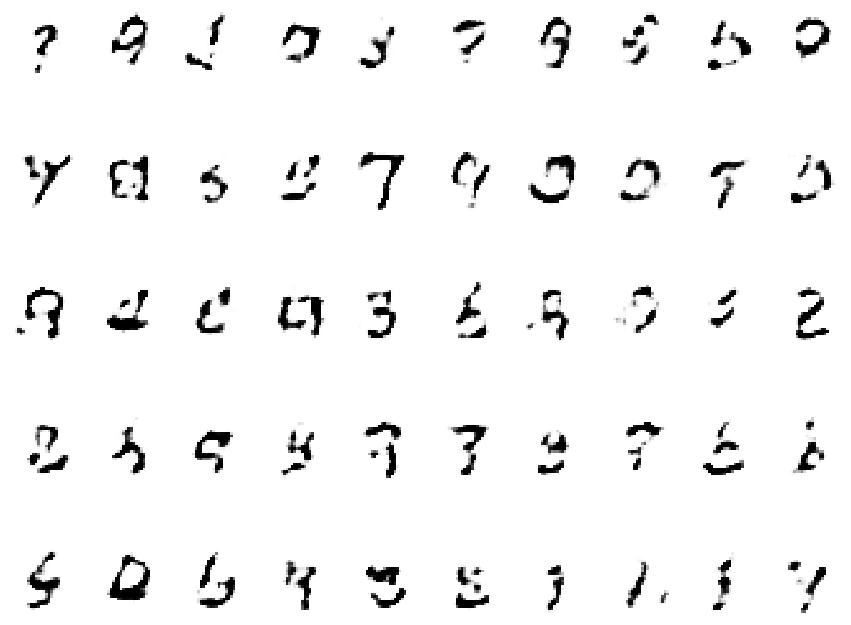

In [75]:
plt.figure(figsize=(15,12))
for i in range(5 * 10):
    # define subplot
    plt.subplot(5, 10, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    #X1[i] = X1[i].reshape((28, 28))
    plottable_image = np.reshape(X[i], (28, 28))
    plt.imshow(plottable_image, cmap='gray_r')
plt.show()